# In the PDF format, the coding may be cut off on the right side at times. For a full picture, please refer to the MATPMD4 Assignment1 3033225.html file.

# Task 1

## a.)

In [39]:
import numpy as np
import pandas as pd
import graphviz  # for display of state


references_1_a = """
https://www.geeksforgeeks.org/create-a-dataframe-from-a-numpy
-array-and-specify-the-index-column-and-column-headers/
https://graphviz.readthedocs.io/en/stable/examples.html
https://graphviz.org/doc/info/attrs.html
"""

# Create transition matrix with numpy
P = np.matrix([
    [0.24, 0.32, 0.26, 0.18],
    [0.31, 0.26, 0.19, 0.24],
    [0.2, 0.25, 0.30, 0.25],
    [0.18, 0.23, 0.27, 0.32]
])

print(P)

# Create dataframe for better display
index_list = ["red", "violet", "blue", "yellow"]  # List of index names
columns_list = ["red", "violet", "blue", "yellow"]  # List of columns
transistion_matrix_df = pd.DataFrame(data = P, 
                  index = index_list, 
                  columns = columns_list)
display(transistion_matrix_df)

[[0.24 0.32 0.26 0.18]
 [0.31 0.26 0.19 0.24]
 [0.2  0.25 0.3  0.25]
 [0.18 0.23 0.27 0.32]]


,red,violet,blue,yellow
red,0.24,0.32,0.26,0.18
violet,0.31,0.26,0.19,0.24
blue,0.20,0.25,0.30,0.25
yellow,0.18,0.23,0.27,0.32


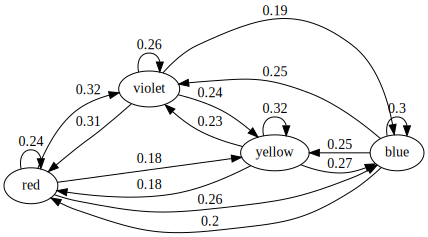

In [40]:
# Create state diagram object and define attributes
state_diagram = graphviz.Digraph('finite_state_machine', filename='task_1_a.gv')
state_diagram.attr(rankdir='LR', size='12')

# Create edges starting from red
state_diagram.edge('red', 'red', label=str(P[0,0]))
state_diagram.edge('red', 'violet', label=str(P[0,1]))
state_diagram.edge('red', 'blue', label=str(P[0,2]))
state_diagram.edge('red', 'yellow', label=str(P[0,3]))

# Create edges starting from violet
state_diagram.edge('violet', 'red', label=str(P[1,0]))
state_diagram.edge('violet', 'violet', label=str(P[1,1]))
state_diagram.edge('violet', 'blue', label=str(P[1,2]))
state_diagram.edge('violet', 'yellow', label=str(P[1,3]))

# Create edges starting from blue
state_diagram.edge('blue', 'red', label=str(P[2,0]))
state_diagram.edge('blue', 'violet', label=str(P[2,1]))
state_diagram.edge('blue', 'blue', label=str(P[2,2]))
state_diagram.edge('blue', 'yellow', label=str(P[2,3]))

# Create edges starting from yellow
state_diagram.edge('yellow', 'red', label=str(P[3,0]))
state_diagram.edge('yellow', 'violet', label=str(P[3,1]))
state_diagram.edge('yellow', 'blue', label=str(P[3,2]))
state_diagram.edge('yellow', 'yellow', label=str(P[3,3]))

display(state_diagram)

## b.)

In [41]:
# Copy the transition matrix P, so the original matrix will not be affected
# by calculations
n_step_transition_matrix = P.copy()
print(n_step_transition_matrix)

# Computation for N-Step Transition matrices
# Starting from step 2 because matrix P already shows the first step
for i in range(2, 8):  # Step 8 is not inclusive
    # Multiply matrices
    n_step_transition_matrix = np.dot(n_step_transition_matrix, P)  
    if i == 3:  # At 3rd step, create 3rd step transition matrix
        step_3_transition_matrix = n_step_transition_matrix  
    elif i == 7:  # At 7th step, create 7th step transition matrix
        step_7_transition_matrix = n_step_transition_matrix

# Create dataframes for better visualization
step_3_transition_matrix_df = pd.DataFrame(data = step_3_transition_matrix, 
                  index = index_list, 
                  columns = columns_list)

step_7_transition_matrix_df = pd.DataFrame(data = step_7_transition_matrix, 
                  index = index_list, 
                  columns = columns_list)

print("3-Step Transition Matrix:")
display(step_3_transition_matrix_df)
print("7-Step Transition Matrix:")
display(step_7_transition_matrix_df)


[[0.24 0.32 0.26 0.18]
 [0.31 0.26 0.19 0.24]
 [0.2  0.25 0.3  0.25]
 [0.18 0.23 0.27 0.32]]
3-Step Transition Matrix:


,red,violet,blue,yellow
red,0.234100,0.264696,0.253770,0.247434
violet,0.234243,0.264379,0.253632,0.247746
blue,0.232965,0.263730,0.254485,0.248820
yellow,0.232329,0.263262,0.254796,0.249613


7-Step Transition Matrix:


,red,violet,blue,yellow
red,0.233410,0.264011,0.25417,0.24841
violet,0.233410,0.264011,0.25417,0.24841
blue,0.233409,0.264010,0.25417,0.24841
yellow,0.233409,0.264010,0.25417,0.24841


## c.)

In [42]:
pi = np.matrix([[0.33, 0.24, 0.03, 0.40]])
# Copy transition matrix so original transition matrix will not be altered
n_step_transition_matrix = P.copy()  

for i in range(2, 7):  # Step 7 is not inclusive
    # Multiply matrices
    n_step_transition_matrix = np.dot(n_step_transition_matrix, P)  
    if i == 6:  # At 6th step, create 6th step transition matrix
        step_6_transition_matrix = n_step_transition_matrix

# Distribution of colours after 6 generations
distribution_of_colors_6_gen = np.dot(pi, step_6_transition_matrix)
print(distribution_of_colors_6_gen)
# print(step_6_transition_matrix)
print("----------------------------------------------")
print(f"After six generations, the distribution of red is: {distribution_of_colors_6_gen[0,0]}")
print("----------------------------------------------")
print(f"After six generations, the distribution of violet is: {distribution_of_colors_6_gen[0,1]}")
print("----------------------------------------------")
print(f"After six generations, the distribution of blue is: {distribution_of_colors_6_gen[0,2]}")
print("----------------------------------------------")
print(f"After six generations, the distribution of yellow is: {distribution_of_colors_6_gen[0,3]}")

[[0.23340932 0.26401054 0.25417018 0.24840996]]
----------------------------------------------
After six generations, the distribution of red is: 0.23340931750281002
----------------------------------------------
After six generations, the distribution of violet is: 0.26401054227600007
----------------------------------------------
After six generations, the distribution of blue is: 0.25417017728259
----------------------------------------------
After six generations, the distribution of yellow is: 0.24840996293860002


## d.)

In [43]:
references_1_d = """
https://ninavergara2.medium.com/calculating-stationary-distribution-in-python-3001d789cd4b
"""
# Transpose P to calculate eigenvectors of the stochastic rows
P_transpose = P.T 

# get eigenvectors and eigenvalues
eigenvalues, eigenvectors = np.linalg.eig(P_transpose)  

# Find the indexes of the eigenvalues that are close to one.
# Use them to select the target eigen vectors. Flatten the result.
close_to_1_idx = np.isclose(eigenvalues,1)
target_eigenvector = eigenvectors[:,close_to_1_idx]
target_eigenvector = target_eigenvector[:,0]
# Turn the eigenvector elements into probabilites
distr = target_eigenvector / sum(target_eigenvector) 
print(distr)
print(f"The stationary distribution for red: {distr[0,0]}")
print("------------------------------------------------------")
print(f"The stationary distribution for violet: {distr[1,0]}")
print("------------------------------------------------------")
print(f"The stationary distribution for blue: {distr[2,0]}")
print("------------------------------------------------------")
print(f"The stationary distribution for yellow: {distr[3,0]}")

[[0.23340934]
 [0.26401056]
 [0.25417017]
 [0.24840994]]
The stationary distribution for red: 0.23340933637345496
------------------------------------------------------
The stationary distribution for violet: 0.2640105604224169
------------------------------------------------------
The stationary distribution for blue: 0.2541701668066723
------------------------------------------------------
The stationary distribution for yellow: 0.24840993639745587


# Task 2

## a.)

In [44]:
references_2_a = """
https://stackoverflow.com/questions/20312216/compute-jordan
-normal-form-of-matrix-in-python-numpyhttps://math.libretexts.org/
Bookshelves/Applied_Mathematics/Applied_Finite_Mathematics_(Sekhon_and_Bloom)/
10%3A_Markov_Chains/10.04%3A_Absorbing_Markov_Chains#:
~:text=The%20matrix%20F%3D(In,the%20non%2Dabsorbing%20state%20i.
"""

P = np.matrix([
    [0.2, 0.1, 0.15, 0, 0.55],
    [0, 1, 0, 0, 0],
    [0.35, 0.2, 0.2, 0.1, 0.15],
    [0, 0, 0, 1, 0],
    [0.25, 0.2, 0.15, 0.25, 0.15]
])


# Create dataframe for better display
index_list = [1, 2, 3, 4, 5]  # create list of index names
columns_list = [1, 2, 3, 4, 5]  # create the columns
transistion_matrix_df = pd.DataFrame(data = P, 
                  index = index_list, 
                  columns = columns_list)

print("Original Matrix P:")
display(transistion_matrix_df)
print("----------------------------------------------------------------")
# Rearrange the columns so that all the ones are aligned to the left
transistion_matrix_df_canonical = transistion_matrix_df[[2, 4, 1, 3, 5]]
# Rearrange rows so that the ones are aligned to the left top as an identity matrix
transistion_matrix_df_canonical = transistion_matrix_df_canonical.reindex([2, 4, 1, 3, 5])
P_canonical_array = transistion_matrix_df_canonical.to_numpy()
P_canonical = np.matrix(P_canonical_array)
print("Canonical of matrix P:")
display(transistion_matrix_df_canonical)
print(P_canonical)
print("----------------------------------------------------------------")
I = P_canonical[:2, :2]  # identity matrix containing the absorbing states
print("Identity matrix:")
print(I)
print("----------------------------------------------------------------")
matrix_of_zeros = P_canonical[:2, 2:]  # entries with only zeros
print("Matrices of zeros:")
print(matrix_of_zeros)
print("----------------------------------------------------------------")
R = P_canonical[2:, :2]  #  transitions from the transient states to the absorbing states
print("Transitions from the transient states to the absorbing states - R:")
print(R)
print("----------------------------------------------------------------")
Q = P_canonical[2:, 2:]  #  transitions among the transient states
print("Transitions among the transient states - Q:")
print(Q)


Original Matrix P:


,1,2,3,4,5
1,0.20,0.1,0.15,0.00,0.55
2,0.00,1.0,0.00,0.00,0.00
3,0.35,0.2,0.20,0.10,0.15
4,0.00,0.0,0.00,1.00,0.00
5,0.25,0.2,0.15,0.25,0.15


----------------------------------------------------------------
Canonical of matrix P:


,2,4,1,3,5
2,1.0,0.00,0.00,0.00,0.00
4,0.0,1.00,0.00,0.00,0.00
1,0.1,0.00,0.20,0.15,0.55
3,0.2,0.10,0.35,0.20,0.15
5,0.2,0.25,0.25,0.15,0.15


[[1.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.  ]
 [0.1  0.   0.2  0.15 0.55]
 [0.2  0.1  0.35 0.2  0.15]
 [0.2  0.25 0.25 0.15 0.15]]
----------------------------------------------------------------
Identity matrix:
[[1. 0.]
 [0. 1.]]
----------------------------------------------------------------
Matrices of zeros:
[[0. 0. 0.]
 [0. 0. 0.]]
----------------------------------------------------------------
Transitions from the transient states to the absorbing states - R:
[[0.1  0.  ]
 [0.2  0.1 ]
 [0.2  0.25]]
----------------------------------------------------------------
Transitions among the transient states - Q:
[[0.2  0.15 0.55]
 [0.35 0.2  0.15]
 [0.25 0.15 0.15]]


## b.)

In [45]:
# Matrix of size / shape of Q with zeros
In = np.zeros(np.shape(Q))
# Fill the diagonals with ones
for i in range(0, len(In)):
    In[i, i] = 1
In = np.matrix(In)
# mean number of times that the process is in a transient state before 
# being absorbed in one of the absorbing states
N = np.linalg.inv(In - Q)
print("Mean number of times that the process is in a transient state before being absorbed in one of the absorbing states:")
print(N)
print("-----------------------------------------------------------")
# will spend 5 steps in A and 1.25 steps in B before being absorbed
print(f"Starting in state 1: We will spend {N[0,0]} steps in state 1")
print(f"Starting in state 1: We will spend {N[0,1]} steps in state 3")
print(f"Starting in state 1: We will spend {N[0,2]} steps in state 5")
print("-----------------------------------------------------------")
print(f"Starting in state 3: We will spend {N[1,0]} steps in state 1")
print(f"Starting in state 1: We will spend {N[1,1]} steps in state 3")
print(f"Starting in state 1: We will spend {N[1,2]} steps in state 5")
print("-----------------------------------------------------------")
print(f"Starting in state 3: We will spend {N[2,0]} steps in state 1")
print(f"Starting in state 1: We will spend {N[2,1]} steps in state 3")
print(f"Starting in state 1: We will spend {N[2,2]} steps in state 5")

Mean number of times that the process is in a transient state before being absorbed in one of the absorbing states:
[[1.95176252 0.62337662 1.3729128 ]
 [0.99443414 1.61038961 0.92764378]
 [0.74953618 0.46753247 1.74397032]]
-----------------------------------------------------------
Starting in state 1: We will spend 1.9517625231910944 steps in state 1
Starting in state 1: We will spend 0.6233766233766234 steps in state 3
Starting in state 1: We will spend 1.37291280148423 steps in state 5
-----------------------------------------------------------
Starting in state 3: We will spend 0.99443413729128 steps in state 1
Starting in state 1: We will spend 1.6103896103896103 steps in state 3
Starting in state 1: We will spend 0.9276437847866419 steps in state 5
-----------------------------------------------------------
Starting in state 3: We will spend 0.7495361781076066 steps in state 1
Starting in state 1: We will spend 0.4675324675324675 steps in state 3
Starting in state 1: We will sp

## c.)

In [46]:
vector_of_ones = np.matrix([[1],
                 [1],
                 [1]])

# Steps when hitting absorption 
M = np.dot(N, vector_of_ones)
# Steps when hitting absorption
print("Steps when hitting absorption:")
print(M)
# So, starting in state A, the process will hit an absorbing state, on average, in 6.25 st
print(f"Starting in state 1, the process will hit an absorbing state, on average, in {M[0,0]} steps")
print(f"Starting in state 3, the process will hit an absorbing state, on average, in {M[1,0]} steps")
print(f"Starting in state 5, the process will hit an absorbing state, on average, in {M[2,0]} steps")

Steps when hitting absorption:
[[3.94805195]
 [3.53246753]
 [2.96103896]]
Starting in state 1, the process will hit an absorbing state, on average, in 3.948051948051948 steps
Starting in state 3, the process will hit an absorbing state, on average, in 3.532467532467532 steps
Starting in state 5, the process will hit an absorbing state, on average, in 2.9610389610389607 steps


## d.)

In [47]:
# Probability that the chain starting in a transient state i and will be in absorbing state j
B = np.dot(N, R)
print(B)
print("-------------------------------------------------------")
print(f"Starting from state 1, the probability of ending up in absorbing state 2: {B[0,0]}")
print(f"Starting from state 1, the probability of ending up in absorbing state 4: {B[0,1]}")
print("-------------------------------------------------------")
print(f"Starting from state 3, the probability of ending up in absorbing state 2: {B[1,0]}")
print(f"Starting from state 3, the probability of ending up in absorbing state 4: {B[1,1]}")
print("-------------------------------------------------------")
print(f"Starting from state 5, the probability of ending up in absorbing state 2: {B[2,0]}")
print(f"Starting from state 5, the probability of ending up in absorbing state 4: {B[2,1]}")

[[0.59443414 0.40556586]
 [0.60705009 0.39294991]
 [0.51725417 0.48274583]]
-------------------------------------------------------
Starting from state 1, the probability of ending up in absorbing state 2: 0.5944341372912801
Starting from state 1, the probability of ending up in absorbing state 4: 0.40556586270871986
-------------------------------------------------------
Starting from state 3, the probability of ending up in absorbing state 2: 0.6070500927643785
Starting from state 3, the probability of ending up in absorbing state 4: 0.3929499072356215
-------------------------------------------------------
Starting from state 5, the probability of ending up in absorbing state 2: 0.5172541743970316
Starting from state 5, the probability of ending up in absorbing state 4: 0.48274582560296847


# Task 3

## Distribution of my choice: Uniform Distribution 
## Additional Condition: Avoid the last n steps with n = 5

## a.)

Start: (10, 10), End: (42.638532752105384, 41.52422963186648)
Start: (10, 10), End: (15.76280530659629, -11.531344991443977)
Start: (10, 10), End: (-4.305588786926266, 47.396151452671546)
Start: (10, 10), End: (42.265952533034394, 17.955343389438788)
Start: (10, 10), End: (0.11904271486405338, 2.8381359931414325)


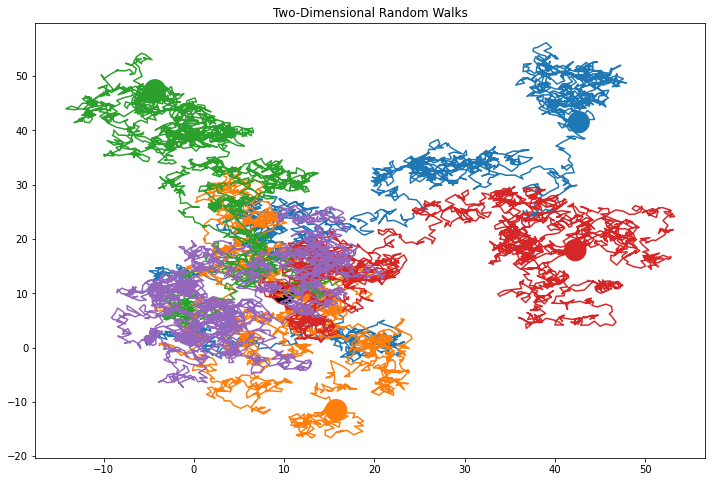

In [48]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)  # Plots with 12 inches width, and 8 inches height

references_3_a = """
https://www.codespeedy.com/random-walk-program-in-python/
"""


def random_walk_2d(steps):
    """
    The initial starting point for (x, y) is (10, 10). This function then chooses
    randomly values for both x and y via a uniformed distribution and adds the result to
    or subtracts the result from the preceeding values. The last five steps will not
    be executed.
    :param steps: Number of steps that are executed in this random walk
    :return x_pos: List of randomly chosen values on x axis
    :return y_pos: List of randomly chosen values on y axis
    """
    n = 5  # Used to calculate the last five steps
    # Lists with starting positions
    x_pos = [10]
    y_pos = [10]
    for i in range (0, steps):
        if i == steps - n:  # Avoid the last five steps
            return x_pos, y_pos
        x_walk = np.random.uniform(-1,1)
        new_x = x_pos[i] + x_walk
        x_pos.append(new_x)
        y_walk = np.random.uniform(-1,1)
        new_y = y_pos[i] + y_walk
        y_pos.append(new_y)
    

# Plot five times the random walk
for i in range(0, 5):
    # retrieve the list of balances per each step and list of steps
    x_values, y_values = random_walk_2d(2500)  
    print(f"Start: ({x_values[0]}, {y_values[0]}), End: ({x_values[-1]}, {y_values[-1]})")
    # Create the plots with step_count on the x-axis and balances_from_random_walk on th y-axis
    plt.plot(x_values, y_values, label = "Random-Walk-2D")
    plt.scatter(x_values[-1], y_values[-1], edgecolors='none', s=500) # highlight end
    # print(x_values[-1], x_values[-1], x_values[-2], x_values[-2])


plt.scatter(10, 10, c='black', edgecolors='none', s=500) # highlight start point
plt.title("Two-Dimensional Random Walks")
plt.show()

## b.) The distances that are calculated here are the euclidea distances from the start to the end point

In [49]:
references_3_b = """
https://www.geeksforgeeks.org/calculate-the-euclidean-distance-using-numpy/
"""
def calculate_expected_euclidean_dist_2d():
    """
    Do the following a 1000:
    1. Call the function random_walk_2d(2500) and simulate
       a walk
    2. Retrieve the starting and end points of each walk 
       generated by the function random_walk_2d(2500).
    3. Calculate the euclidean distance and append the value to
       the list euclidean_distances that cointains all euclidean
       distances after 1000 runs
    4. Calculate the average of the values of the list euclidean_distances
    """
    euclidean_distances = []
    for i in range(0, 1000):  # 1000 walks
        # Generate random walk with 2500 steps
        x_pos, y_pos = random_walk_2d(2500)
        # Retrieve starting and end point of each walk
        starting_point = np.array((x_pos[0], y_pos[0]))
        end_point = np.array((x_pos[-1], y_pos[-1]))
        # Calculate euclidean distance between starting and end point
        euclidean_distance = np.linalg.norm(end_point - starting_point)
        # Append euclidean distance to the list that cointains all euclidean distances
        euclidean_distances.append(euclidean_distance)
    # Calculate the average euclidean distance after 1000 walks
    avg_euclidean_distance = sum(euclidean_distances)/len(euclidean_distances)
    print(f" The expected euclidean distance is: {avg_euclidean_distance}")
calculate_expected_euclidean_dist_2d()

 The expected euclidean distance is: 35.805246987468244


# Task 4

Expected value of the walk after 2500 steps: 1002.8191062762895


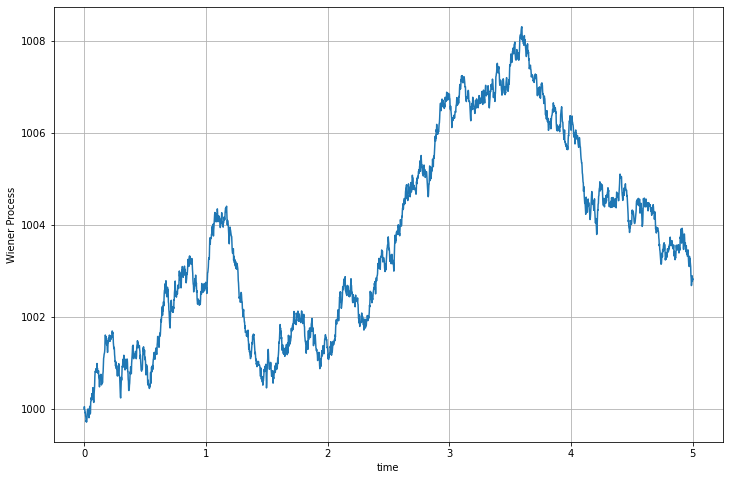

In [50]:
import math

references_4 = """
https://www.quantconnect.com/tutorials/introduction-to-options/stochastic-processes-and-monte-carlo-method
"""
def wiener_process(T, N):
    """
    The starting point /  of the one-dimensional wiener process is 1000. The drift is set at 1.2 and the
    noise factor of the Wiener Process is set at 2. The equally sized time units are calculated by dividing
    the total time with the total number of steps. Both the total time and the total number of steps are 
    input parameters with no fixed value. For each step, the following commands are executed:
    1. find the randomly and normally distributed variable e with mean 0 and standard deviation 1
    2. Calculate the value change estimated by the wiener process
    3. Add the value change to the preceding value and append the new value to the list containing all values
    4. Returng the list of all values derived from the Wiener Process
    :param T: Total time
    :param N: Total number of steps
    :return values_wiener: List of estimated values for each step
    """
    values_wiener = [1000]  # The starting point is 1000
    a = 1.2  # Drift per unit time
    b = 2  # Factor for the noise of the wiener process dz
    dt = T/float(N)  # Change in time / unit of time
    for i in range(0, N):
        #  random variable drawn from a standardised Normal Distribution, N(0, 1)
        e = np.random.normal(0, 1) 
        # Wiener process for a variable x --> Change in value in after time unit dt
        dx = a*dt + b*e*math.sqrt(dt)   
        current_value = values_wiener[i] + dx
        values_wiener.append(current_value)
    return values_wiener
    

steps = 2500  # number of steps
T = 5  # Interval length of 5 years

# Return evenly spaced numbers over the specified time interval
# np.linspace(start, stop, number of samples)
# steps+1 for Number of samples, because we want to include 0 - 2500 steps
t = np.linspace(0.0, T, steps+1) 

plt.figure(figsize=(12,8))
values_from_wiener_process = wiener_process(T, steps)
plt.plot(t, values_from_wiener_process)
plt.xlabel('time')
plt.ylabel('Wiener Process')
plt.grid(True)
print(f"Expected value of the walk after 2500 steps: {values_from_wiener_process[-1]}")


# Task 5

## a.) + b.)

In [51]:
references_5 = """
https://www.kite.com/python/answers/how-to-set-axis-limits-in-matplotlib-in-python
https://stackoverflow.com/questions/9215658/plot-a-circle-with-pyplot
https://www.geeksforgeeks.org/how-to-draw-a-circle-using-matplotlib-in-python/
https://stackoverflow.com/questions/481144/equation-for-testing-if-a-point-is-inside-a-circle
"""
plt.rcParams["figure.figsize"] = (8,8)  # Plots with 8 inches width, and 8 inches height

# Create cirlces for each markov chain to bypass error when displaying graphs
radius_circle = 0.5
circle1 = plt.Circle((0.5, 0.5), 0.5, fill = False)
circle2 = plt.Circle((0.5, 0.5), 0.5, fill = False)
circle3 = plt.Circle((0.5, 0.5), 0.5, fill = False)
circle4 = plt.Circle((0.5, 0.5), 0.5, fill = False)
circle5 = plt.Circle((0.5, 0.5), 0.5, fill = False)

def create_markov_chains(circle):
    """
    It is assumed, that the values on the x axis and y axis are chosen randomly
    from 0 to 1 in and are uniformly distributed. Each point can be randomly
    chosen with the same probability. This happens 2500 times. When the numbers 
    on the x and y axis are chosen, they are stored in the lists x and y. Both lists
    are stored in the list of tuples markov_chain_all_points that stores the entries
    of x and y in the following fassion: [(x[0], y[0]), (x[1], y[1]), ...]. Afterwards,
    the entries of markov_chain_all_points that lie within the cirlce are stored in
    markov_chain_points_in_circle.
    :param circle: Circle per each markov chain for display markov_chain_all_points
    :return markov_chain_all_points: list of that stores the entries
                                     of x and y in the following fassion: 
                                     [(x[0], y[0]), (x[1], y[1]), ...]
    :return markov_chain_points_in_circle: Entries of markov_chain_all_points 
                                           that lie within the cirlce
    """
    # Create lists for scatter plot
    x = []
    y = []
    for i in range(0, 200000):  # 200000 Steps
        # Choose values on x and y axis randomly - x and y uniformly distributed
        x_value = np.random.uniform(0,1)
        y_value = np.random.uniform(0,1)
        # Fill the lists for scatter plots with values
        x.append(x_value)
        y.append(y_value)
    # Store values of x and y as a list of tuples
    markov_chain_all_points = [(elm1, elm2) for elm1, elm2 in zip(x,y)]
    # Only points within circle
    markov_chain_points_in_circle = [elm for elm in markov_chain_all_points if (elm[0]-0.5)**2 + (elm[1]-0.5)**2 <= radius_circle**2]
    return markov_chain_all_points, markov_chain_points_in_circle
 

In [52]:
# First markov chain
# Return all randomly chosen points and all randomly chosen points in the circle
# Display scatter plot for all randomly chosen points
markov_chain_1_all_points, markov_chain_1_points_in_circle = create_markov_chains(circle1)
pi_first_chain = 4*(len(markov_chain_1_points_in_circle)/len(markov_chain_1_all_points))
print(f"Pi first markov chain: {pi_first_chain}")

Pi first markov chain: 3.1457


In [53]:
# Second markov chain
# Return all randomly chosen points and all randomly chosen points in the circle
# Display scatter plot for all randomly chosen points
markov_chain_2_all_points, markov_chain_2_points_in_circle = create_markov_chains(circle2)
pi_second_chain = 4*(len(markov_chain_2_points_in_circle)/len(markov_chain_2_all_points))
print(f"Pi second markov chain: {pi_second_chain}")

Pi second markov chain: 3.13836


In [54]:
# Third markov chain
# Return all randomly chosen points and all randomly chosen points in the circle
# Display scatter plot for all randomly chosen points
markov_chain_3_all_points, markov_chain_3_points_in_circle = create_markov_chains(circle3)
pi_third_chain = 4*(len(markov_chain_3_points_in_circle)/len(markov_chain_3_all_points))
print(f"Pi third markov chain: {pi_third_chain}")

Pi third markov chain: 3.14626


In [55]:
# Forth markov chain
# Return all randomly chosen points and all randomly chosen points in the circle
# Display scatter plot for all randomly chosen points
markov_chain_4_all_points, markov_chain_4_points_in_circle = create_markov_chains(circle4)
pi_fourth_chain = 4*(len(markov_chain_4_points_in_circle)/len(markov_chain_4_all_points))
print(f"Pi fourth markov chain: {pi_fourth_chain}")

Pi fourth markov chain: 3.14142


In [56]:
# Fifth markov chain
# Return all randomly chosen points and all randomly chosen points in the circle
# Display scatter plot for all randomly chosen points
markov_chain_5_all_points, markov_chain_5_points_in_circle = create_markov_chains(circle5)
pi_fifth_chain = 4*(len(markov_chain_5_points_in_circle)/len(markov_chain_5_all_points))
print(f"Pi fifth markov chain: {pi_fifth_chain}")

Pi fifth markov chain: 3.14958


In [57]:
all_pi_values = [pi_first_chain, pi_second_chain, pi_third_chain, pi_fourth_chain, pi_fifth_chain]
pi_avg = sum(all_pi_values)/len(all_pi_values)
print(f"Pi values from all 5 Markov chains: {all_pi_values}")
print(f"Average pi value of all five chains: {pi_avg}")
print(f"Between Chain Variance: {np.var(all_pi_values)}")

Pi values from all 5 Markov chains: [3.1457, 3.13836, 3.14626, 3.14142, 3.14958]
Average pi value of all five chains: 3.144264
Between Chain Variance: 1.545030399999938e-05
